
Folder: 01_GT
  Displaying up to 3 images from Subfolder: SEG
    Subfolder: SEG, Displaying image: man_seg005.tif
    Subfolder: SEG, Displaying image: man_seg067.tif
    Subfolder: SEG, Displaying image: man_seg039.tif
  Displaying up to 3 images from Subfolder: TRA
    Subfolder: TRA, Displaying image: man_track059.tif
    Subfolder: TRA, Displaying image: man_track007.tif
    Subfolder: TRA, Displaying image: man_track065.tif


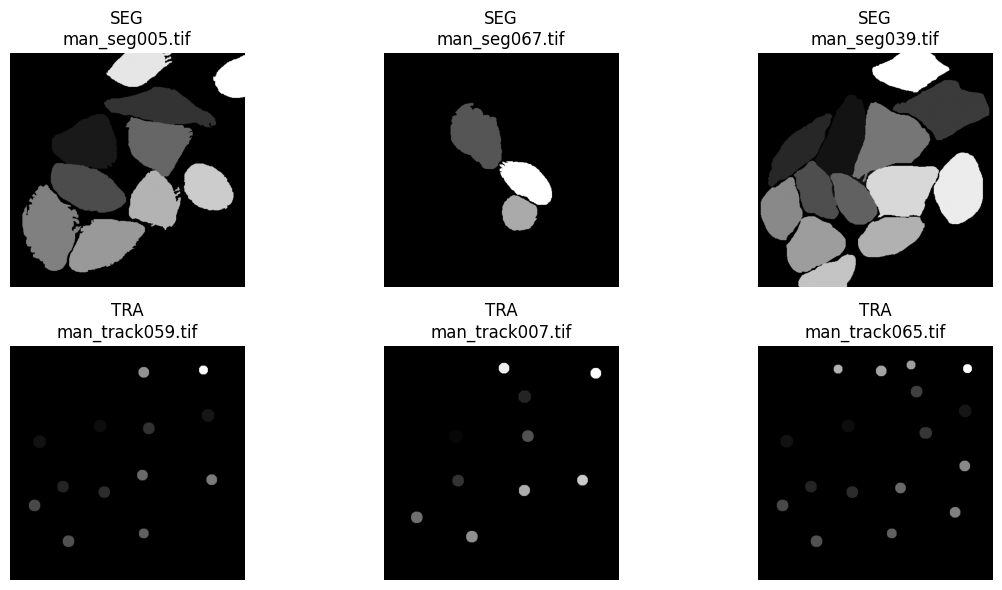


Folder: 01_ERR_SEG
  Displaying up to 3 images from ERR_SEG (Direct)
    Displaying image: mask001.tif
    Displaying image: mask010.tif
    Displaying image: mask043.tif


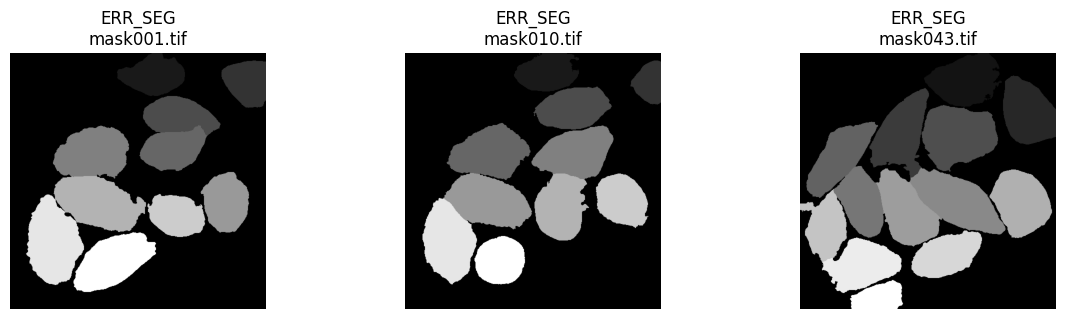


Folder: 01_ST
  Displaying up to 3 images from Subfolder: SEG
    Subfolder: SEG, Displaying image: man_seg029.tif
    Subfolder: SEG, Displaying image: man_seg037.tif
    Subfolder: SEG, Displaying image: man_seg068.tif
  No images found in Subfolder: TRA


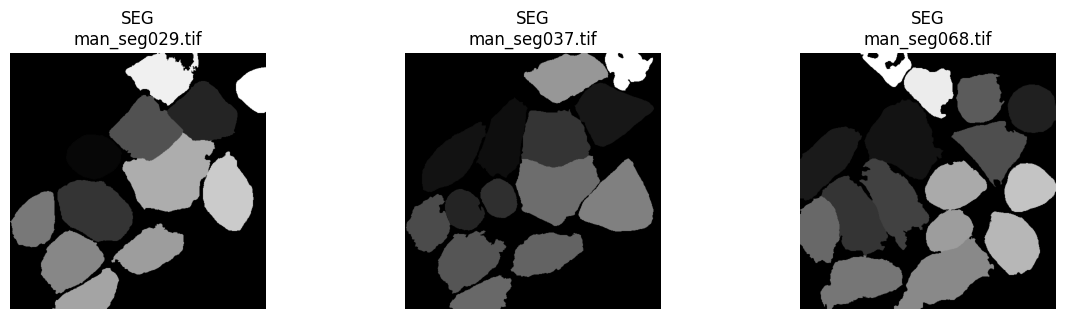


Folder: 02_GT
  Displaying up to 3 images from Subfolder: SEG
    Subfolder: SEG, Displaying image: man_seg038.tif
    Subfolder: SEG, Displaying image: man_seg006.tif
    Subfolder: SEG, Displaying image: man_seg067.tif
  Displaying up to 3 images from Subfolder: TRA
    Subfolder: TRA, Displaying image: man_track059.tif
    Subfolder: TRA, Displaying image: man_track007.tif
    Subfolder: TRA, Displaying image: man_track065.tif


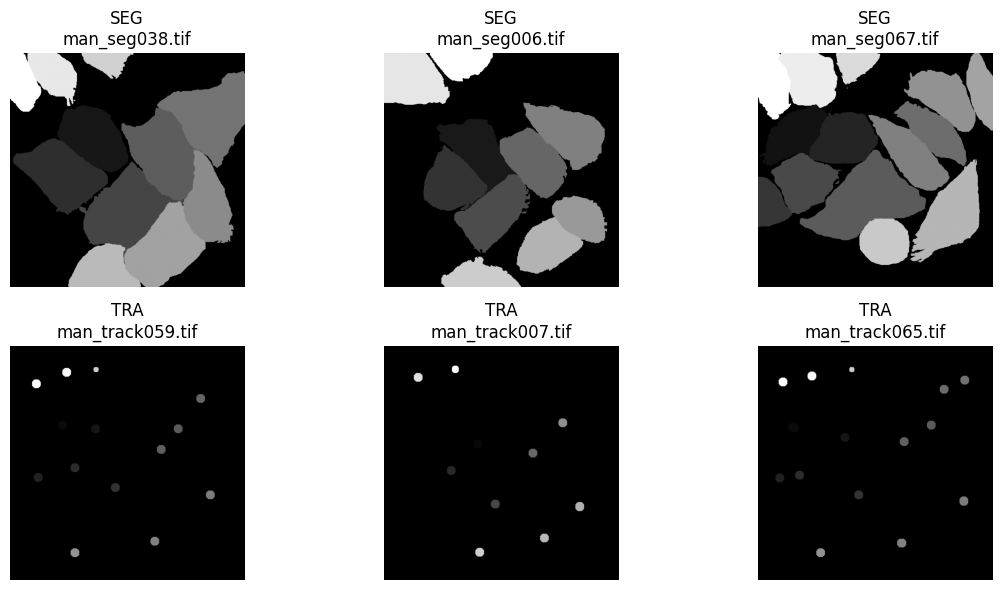


Folder: 02_ERR_SEG
  Displaying up to 3 images from ERR_SEG (Direct)
    Displaying image: mask001.tif
    Displaying image: mask010.tif
    Displaying image: mask043.tif


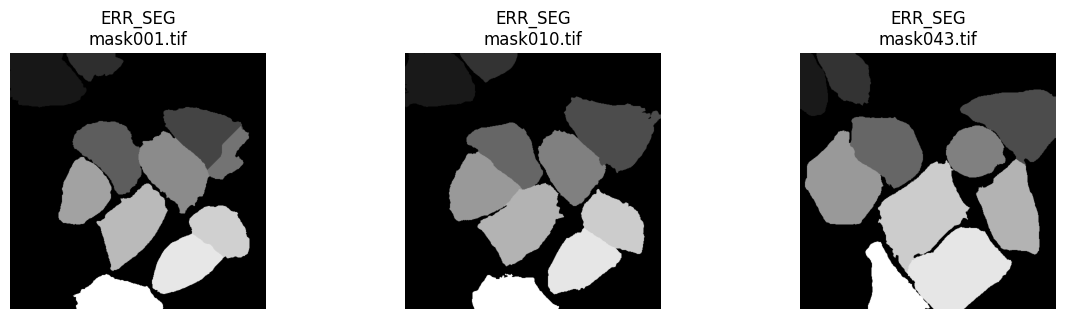


Folder: 02_ST
  Displaying up to 3 images from Subfolder: SEG
    Subfolder: SEG, Displaying image: man_seg029.tif
    Subfolder: SEG, Displaying image: man_seg037.tif
    Subfolder: SEG, Displaying image: man_seg068.tif
  No images found in Subfolder: TRA


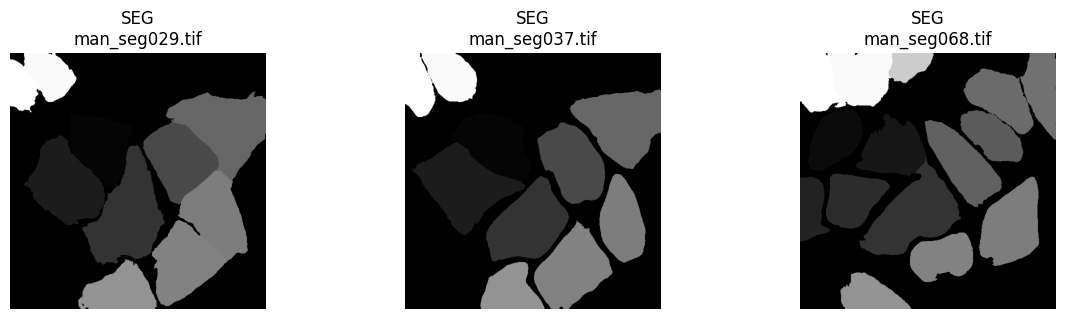


Iteration complete.


In [1]:
import glob
import os

import matplotlib.pyplot as plt
from PIL import Image

# Define the base directory path to your training dataset
base_dir = "DIC-C2DH-HeLa-Train"  # <--- ADJUST THIS PATH if necessary

# List of potential mask folder suffixes
mask_folder_suffixes = ["_GT", "_ERR_SEG", "_ST"]

# List of subfolders inside mask directories (SEG and TRA) - for _GT and _ST
mask_subfolders = ["SEG", "TRA"]

# Number of images to display from each folder/subfolder
num_images_to_display = 3  # Display up to 3 images from each

# Iterate through each set number (01, 02, etc.)
for set_num in ["01", "02"]:  # Add more set numbers if you have them
    for suffix in mask_folder_suffixes:
        folder_name = f"{set_num}{suffix}"
        print(f"\nFolder: {folder_name}")  # Print the folder name

        plt.figure(
            figsize=(12, 6),
        )  # Create a figure for each folder, adjust size as needed
        image_count = 0  # Track total images displayed in this figure

        if suffix == "_ERR_SEG":  # Handle _ERR_SEG folders
            mask_dir_pattern = os.path.join(base_dir, folder_name, "*.tif")
            files = glob.glob(mask_dir_pattern)
            if files:
                print(
                    f"  Displaying up to {num_images_to_display} images from ERR_SEG (Direct)",
                )
                for i in range(
                    min(num_images_to_display, len(files)),
                ):  # Loop up to num_images_to_display or file count
                    image_file = files[i]
                    try:
                        img = Image.open(image_file)
                        image_count += 1
                        plt.subplot(
                            2,
                            num_images_to_display,
                            image_count,
                        )  # 2 rows, num_images_to_display cols
                        plt.imshow(img, cmap="gray")
                        plt.title(f"ERR_SEG\n{os.path.basename(image_file)}")
                        plt.axis("off")
                        print(f"    Displaying image: {os.path.basename(image_file)}")
                    except Exception as e:
                        print(
                            f"    Error opening image: {os.path.basename(image_file)} - {e}",
                        )
            else:
                print("  No images found in ERR_SEG (Direct)")

        else:  # Handle _GT and _ST folders with SEG/TRA subfolders
            for subfolder in mask_subfolders:
                mask_dir_pattern = os.path.join(
                    base_dir,
                    folder_name,
                    subfolder,
                    "*.tif",
                )
                files = glob.glob(mask_dir_pattern)
                if files:
                    print(
                        f"  Displaying up to {num_images_to_display} images from Subfolder: {subfolder}",
                    )
                    for i in range(
                        min(num_images_to_display, len(files)),
                    ):  # Loop up to num_images_to_display or file count
                        image_file = files[i]
                        try:
                            img = Image.open(image_file)
                            image_count += 1
                            subplot_position = (
                                num_images_to_display * (0 if subfolder == "SEG" else 1)
                                + image_count
                            )  # Calculate subplot position
                            plt.subplot(
                                2,
                                num_images_to_display,
                                subplot_position,
                            )  # 2 rows, num_images_to_display cols
                            plt.imshow(img, cmap="gray")
                            plt.title(f"{subfolder}\n{os.path.basename(image_file)}")
                            plt.axis("off")
                            print(
                                f"    Subfolder: {subfolder}, Displaying image: {os.path.basename(image_file)}",
                            )
                        except Exception as e:
                            print(
                                f"    Error opening image from {subfolder}: {os.path.basename(image_file)} - {e}",
                            )
                else:
                    print(f"  No images found in Subfolder: {subfolder}")
                image_count = 0  # Reset image_count for next subfolder row

        plt.tight_layout()
        plt.show()

print("\nIteration complete.")